<a href="https://colab.research.google.com/github/Lauriano-Viana/fase-07-challenge-sp-03/blob/main/fase07_challenge_sprint_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# montar o google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Preparação dos Dados

Instalação das bibliotecas necessarias

In [ ]:
!pip install numpy
!pip install pandas
!pip install pillow
!pip install matplotlib
!pip install seaborn

## 2. Série historica Cana-de-açucar


ANÁLISE DE PRODUTIVIDADE DE CANA-DE-AÇÚCAR

Estatísticas de Produtividade (PI):
- Média: 48.03 t/ha
- Máximo: 71.31 t/ha (Safra 2011/12)
- Mínimo: 0.66 t/ha (Safra 2006/07)


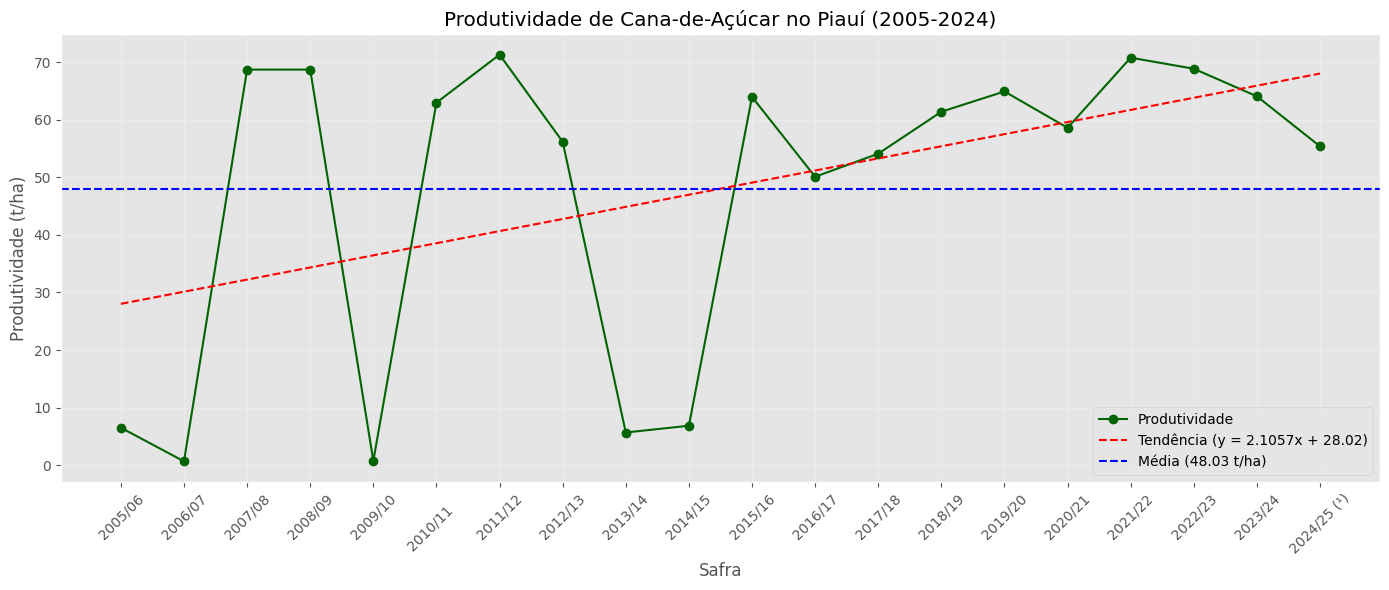


ANÁLISE DE DADOS NDVI

Estatísticas do NDVI:
- Média: 0.548
- Máximo: 0.819 em 07/04/2017
- Mínimo: -0.245 em 19/12/2003


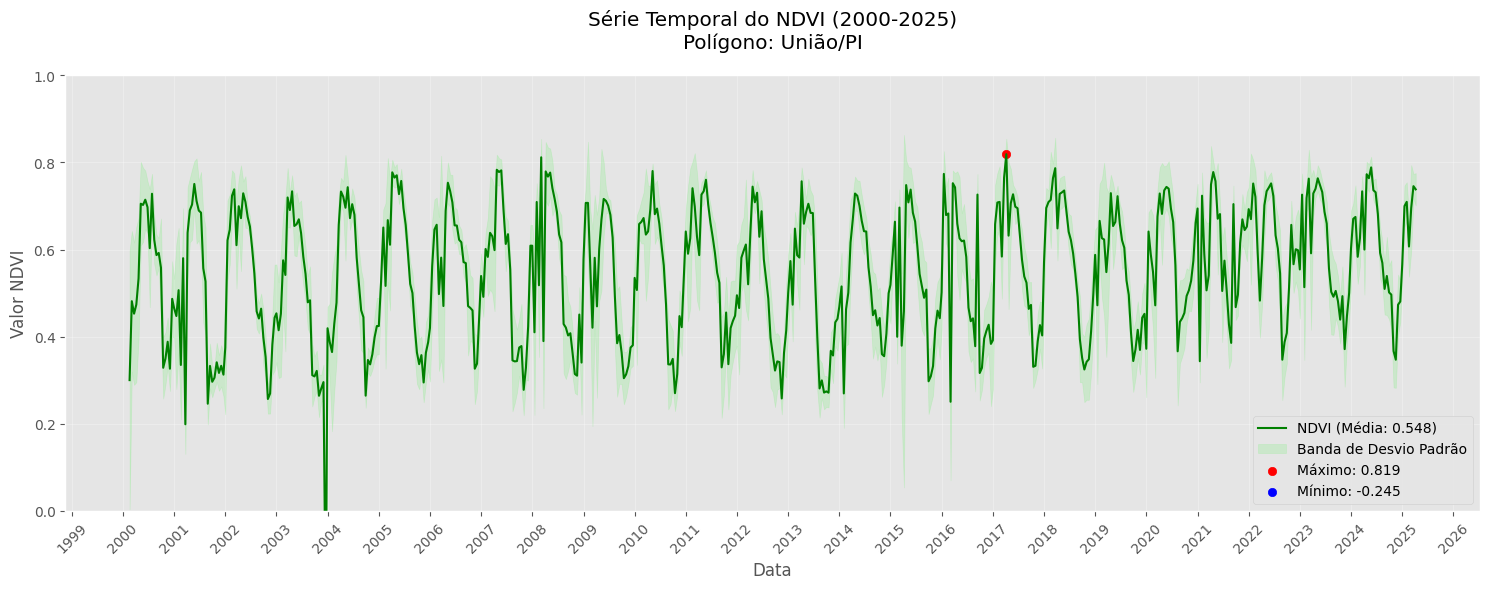

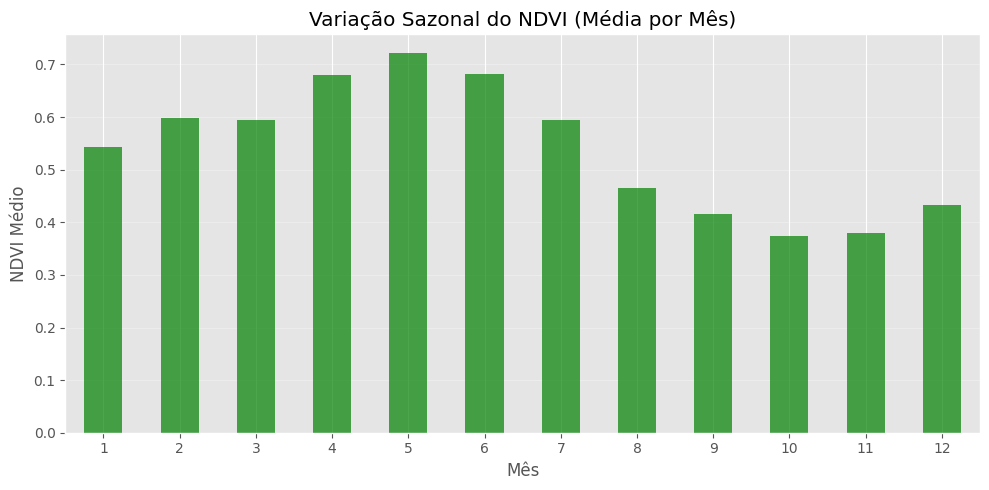

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import dates as mdates

# ==============================================
# ANÁLISE DA PRODUTIVIDADE DE CANA-DE-AÇÚCAR
# ==============================================

# Carregar e processar dados de produtividade
def processar_produtividade():
    try:
        df_prod = pd.read_csv('/content/drive/MyDrive/fase-06-challenge-sp-02/fontes-dados/serie-cana-acucar.csv', skiprows=4, encoding='utf-8')
        df_prod = df_prod.dropna(how='all').set_index('REGIÃO/UF')
        pi_data = df_prod.loc['PI'].apply(lambda x: float(str(x).replace('.', '').replace(',', '.')))

        # Calcular estatísticas
        stats = {
            'média': pi_data.mean() / 1000,
            'máximo': pi_data.max() / 1000,
            'mínimo': pi_data.min() / 1000,
            'ano_max': pi_data.idxmax(),
            'ano_min': pi_data.idxmin()
        }

        return pi_data, stats
    except Exception as e:
        print(f"Erro ao processar produtividade: {e}")
        return None, None

# ==============================================
# ANÁLISE DOS DADOS NDVI
# ==============================================

# Carregar e processar dados NDVI
def processar_ndvi():
    try:
        # Pular linhas de cabeçalho e ler dados
        df_ndvi = pd.read_csv('/content/drive/MyDrive/fase-06-challenge-sp-02/fontes-dados/ndvi-2005-2025.csv', skiprows=3, encoding='utf-8')

        # Converter datas e valores
        df_ndvi['Data'] = pd.to_datetime(df_ndvi['Data'], dayfirst=True)

        # Converter valores NDVI (tratando vírgula como decimal)
        for col in ['NDVI', 'Média - Desvio Padrão', 'Média + Desvio Padrão']:
            df_ndvi[col] = df_ndvi[col].str.replace(',', '.').astype(float)

        # Calcular estatísticas
        stats = {
            'média': df_ndvi['NDVI'].mean(),
            'máximo': df_ndvi['NDVI'].max(),
            'mínimo': df_ndvi['NDVI'].min(),
            'data_max': df_ndvi.loc[df_ndvi['NDVI'].idxmax(), 'Data'],
            'data_min': df_ndvi.loc[df_ndvi['NDVI'].idxmin(), 'Data']
        }

        return df_ndvi, stats
    except Exception as e:
        print(f"Erro ao processar NDVI: {e}")
        return None, None

# ==============================================
# VISUALIZAÇÃO DOS DADOS
# ==============================================

def plotar_produtividade(pi_data, stats):
    """Gráficos para dados de produtividade"""
    plt.style.use('ggplot')

    # Gráfico de linha com tendência
    plt.figure(figsize=(14, 6))
    plt.plot(pi_data.index, pi_data.values/1000, marker='o', color='darkgreen', label='Produtividade')

    # Linha de tendência
    x = np.arange(len(pi_data))
    z = np.polyfit(x, pi_data.values/1000, 1)
    p = np.poly1d(z)
    plt.plot(pi_data.index, p(x), 'r--', label=f'Tendência (y = {z[0]:.4f}x + {z[1]:.2f})')

    plt.axhline(y=stats['média'], color='blue', linestyle='--', label=f'Média ({stats["média"]:.2f} t/ha)')
    plt.title('Produtividade de Cana-de-Açúcar no Piauí (2005-2024)')
    plt.xlabel('Safra')
    plt.ylabel('Produtividade (t/ha)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def plotar_ndvi(df_ndvi, stats):
    """Gráficos para dados NDVI"""
    plt.style.use('ggplot')

    # Gráfico de série temporal com banda de desvio padrão
    plt.figure(figsize=(15, 6))

    # Plotar NDVI médio
    plt.plot(df_ndvi['Data'], df_ndvi['NDVI'],
             label=f'NDVI (Média: {stats["média"]:.3f})',
             color='green', linewidth=1.5)

    # Plotar banda de desvio padrão
    plt.fill_between(df_ndvi['Data'],
                     df_ndvi['Média - Desvio Padrão'],
                     df_ndvi['Média + Desvio Padrão'],
                     color='lightgreen', alpha=0.3,
                     label='Banda de Desvio Padrão')

    # Destacar valores extremos
    plt.scatter(stats['data_max'], stats['máximo'],
                color='red', label=f'Máximo: {stats["máximo"]:.3f}')
    plt.scatter(stats['data_min'], stats['mínimo'],
                color='blue', label=f'Mínimo: {stats["mínimo"]:.3f}')

    # Configurações do gráfico
    plt.title('Série Temporal do NDVI (2000-2025)\nPolígono: União/PI', pad=20)
    plt.xlabel('Data')
    plt.ylabel('Valor NDVI')
    plt.ylim(0, 1)  # NDVI varia entre -1 e 1

    # Formatar eixo de datas
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)

    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Gráfico sazonal (agrupado por mês)
    df_ndvi['Mês'] = df_ndvi['Data'].dt.month
    monthly = df_ndvi.groupby('Mês')['NDVI'].mean()

    plt.figure(figsize=(10, 5))
    monthly.plot(kind='bar', color='green', alpha=0.7)
    plt.title('Variação Sazonal do NDVI (Média por Mês)')
    plt.xlabel('Mês')
    plt.ylabel('NDVI Médio')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ==============================================
# EXECUÇÃO PRINCIPAL
# ==============================================

def main():
    print("\n" + "="*50)
    print("ANÁLISE DE PRODUTIVIDADE DE CANA-DE-AÇÚCAR")
    print("="*50)
    pi_data, prod_stats = processar_produtividade()

    if pi_data is not None:
        print(f"\nEstatísticas de Produtividade (PI):")
        print(f"- Média: {prod_stats['média']:.2f} t/ha")
        print(f"- Máximo: {prod_stats['máximo']:.2f} t/ha (Safra {prod_stats['ano_max']})")
        print(f"- Mínimo: {prod_stats['mínimo']:.2f} t/ha (Safra {prod_stats['ano_min']})")
        plotar_produtividade(pi_data, prod_stats)

    print("\n" + "="*50)
    print("ANÁLISE DE DADOS NDVI")
    print("="*50)
    df_ndvi, ndvi_stats = processar_ndvi()

    if df_ndvi is not None:
        print(f"\nEstatísticas do NDVI:")
        print(f"- Média: {ndvi_stats['média']:.3f}")
        print(f"- Máximo: {ndvi_stats['máximo']:.3f} em {ndvi_stats['data_max'].strftime('%d/%m/%Y')}")
        print(f"- Mínimo: {ndvi_stats['mínimo']:.3f} em {ndvi_stats['data_min'].strftime('%d/%m/%Y')}")
        plotar_ndvi(df_ndvi, ndvi_stats)

if __name__ == "__main__":
    main()

## 3. Comparação NDVI e Produtividade Série Historica

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# ==============================================
# 1. CARREGAR E PROCESSAR OS DADOS ORIGINAIS
# ==============================================

def carregar_produtividade():
    try:
        df = pd.read_csv('/content/drive/MyDrive/fase-06-challenge-sp-02/fontes-dados/serie-cana-acucar.csv', skiprows=4, encoding='utf-8')
        df = df.dropna(how='all').set_index('REGIÃO/UF')
        pi_data = df.loc['PI'].apply(lambda x: float(str(x).replace('.', '').replace(',', '.')))

        df_prod = pd.DataFrame({
            'Safra': pi_data.index,
            'Produtividade_kg_ha': pi_data.values
        })

        df_prod['Ano_Safra'] = df_prod['Safra'].str.split('/').str[0].astype(int)
        df_prod['Produtividade_t_ha'] = df_prod['Produtividade_kg_ha'] / 1000

        return df_prod[['Ano_Safra', 'Safra', 'Produtividade_kg_ha', 'Produtividade_t_ha']]
    except Exception as e:
        print(f"Erro ao carregar produtividade: {e}")
        return None

def carregar_ndvi():
    try:
        df = pd.read_csv('/content/drive/MyDrive/fase-06-challenge-sp-02/fontes-dados/ndvi-2005-2025.csv', skiprows=3, encoding='utf-8')
        df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)

        # Converter TODAS as colunas numéricas corretamente
        for col in ['NDVI', 'Média - Desvio Padrão', 'Média + Desvio Padrão']:
            # Remover aspas se existirem e substituir vírgula por ponto
            df[col] = df[col].astype(str).str.replace('"', '').str.replace(',', '.').astype(float)

        # Calcular média anual
        df['Ano'] = df['Data'].dt.year
        df_ndvi_anual = df.groupby('Ano').agg({
            'NDVI': 'mean',
            'Média - Desvio Padrão': 'mean',
            'Média + Desvio Padrão': 'mean'
        }).reset_index()

        return df_ndvi_anual
    except Exception as e:
        print(f"Erro detalhado ao carregar NDVI: {str(e)}")
        print("Problema geralmente está na conversão de números com vírgula")
        print("Exemplo de dados problemáticos:")
        print(df[['NDVI', 'Média - Desvio Padrão', 'Média + Desvio Padrão']].head())
        return None

# ==============================================
# 2. FUNÇÕES AUXILIARES
# ==============================================

def combinar_dados(df_prod, df_ndvi):
    if df_prod is None or df_ndvi is None:
        return None

    df_completo = pd.merge(
        df_prod,
        df_ndvi,
        left_on='Ano_Safra',
        right_on='Ano',
        how='left'
    )

    # Preencher valores ausentes
    for col in ['NDVI', 'Média - Desvio Padrão', 'Média + Desvio Padrão']:
        df_completo[col] = df_completo[col].interpolate(limit_direction='both')

    # Tratar outliers
    for col in ['Produtividade_t_ha', 'NDVI']:
        q1 = df_completo[col].quantile(0.25)
        q3 = df_completo[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        median_val = df_completo[col].median()
        df_completo.loc[(df_completo[col] < lower_bound) | (df_completo[col] > upper_bound), col] = median_val

    return df_completo[[
        'Ano_Safra', 'Safra',
        'Produtividade_kg_ha', 'Produtividade_t_ha',
        'NDVI', 'Média - Desvio Padrão', 'Média + Desvio Padrão'
    ]].sort_values('Ano_Safra')

# ==============================================
# 3. EXECUÇÃO PRINCIPAL
# ==============================================

def main():
    print("Carregando dados de produtividade...")
    df_prod = carregar_produtividade()

    print("\nCarregando dados NDVI...")
    df_ndvi = carregar_ndvi()

    if df_prod is not None:
        print("\nDados de produtividade carregados com sucesso!")
        print(df_prod.head())
    else:
        print("\nFalha ao carregar dados de produtividade")

    if df_ndvi is not None:
        print("\nDados NDVI carregados com sucesso!")
        print(df_ndvi.head())
    else:
        print("\nFalha ao carregar dados NDVI")

    if df_prod is None or df_ndvi is None:
        print("\nNão foi possível continuar devido a erros na carga de dados")
        return

    print("\nCombinando dados...")
    df_final = combinar_dados(df_prod, df_ndvi)

    if df_final is not None:
        print("\nTABELA FINAL COMBINADA:")
        print(df_final.round(3).to_string(index=False))

        # Salvar resultado
        df_final.to_csv('dados_combinados_corrigidos.csv', index=False, encoding='utf-8')
        print("\nArquivo salvo como 'dados_combinados_corrigidos.csv'")
    else:
        print("\nFalha ao combinar dados")

if __name__ == "__main__":
    main()

Carregando dados de produtividade...

Carregando dados NDVI...

Dados de produtividade carregados com sucesso!
   Ano_Safra    Safra  Produtividade_kg_ha  Produtividade_t_ha
0       2005  2005/06               6499.0               6.499
1       2006  2006/07                657.0               0.657
2       2007  2007/08              68718.0              68.718
3       2008  2008/09              68718.0              68.718
4       2009  2009/10                746.0               0.746

Dados NDVI carregados com sucesso!
    Ano      NDVI  Média - Desvio Padrão  Média + Desvio Padrão
0  2000  0.531475               0.431370               0.631580
1  2001  0.476830               0.396504               0.557170
2  2002  0.541800               0.481057               0.602543
3  2003  0.470709               0.392991               0.548457
4  2004  0.513943               0.446752               0.581130

Combinando dados...

TABELA FINAL COMBINADA:
 Ano_Safra       Safra  Produtividade_kg_ha  

## 4. Análise Estatística e Correlação ( NDVI e Produtividade )




Dados carregados com sucesso! Primeiras linhas:
   Ano_Safra    Safra  Produtividade_kg_ha  Produtividade_t_ha      NDVI  \
0       2005  2005/06               6499.0               6.499  0.551400   
1       2006  2006/07                657.0               0.657  0.561578   
2       2007  2007/08              68718.0              68.718  0.536604   
3       2008  2008/09              68718.0              68.718  0.547965   
4       2009  2009/10                746.0               0.746  0.525126   

   Média - Desvio Padrão  Média + Desvio Padrão  
0               0.490987               0.611822  
1               0.481522               0.641652  
2               0.467274               0.605978  
3               0.470852               0.625070  
4               0.432257               0.617996  

ANÁLISE DE CORRELAÇÃO ENTRE NDVI E PRODUTIVIDADE

Correlação de Pearson (linear):
Coeficiente (r): 0.464
Valor-p: 0.0393

Correlação de Spearman (não linear):
Coeficiente (ρ): 0.417
Valor-p: 0.

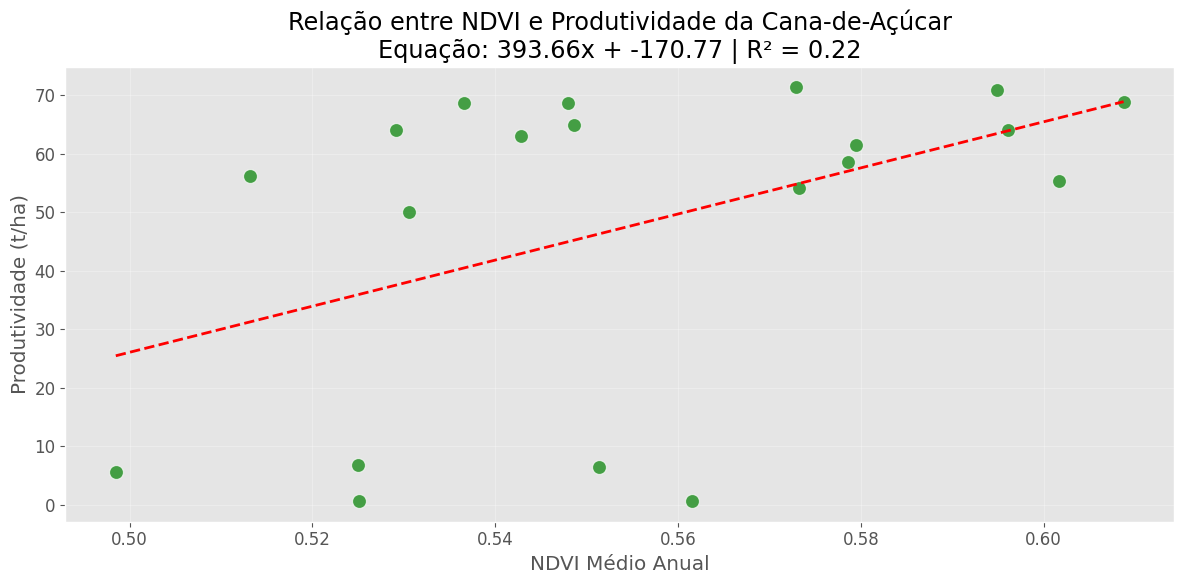

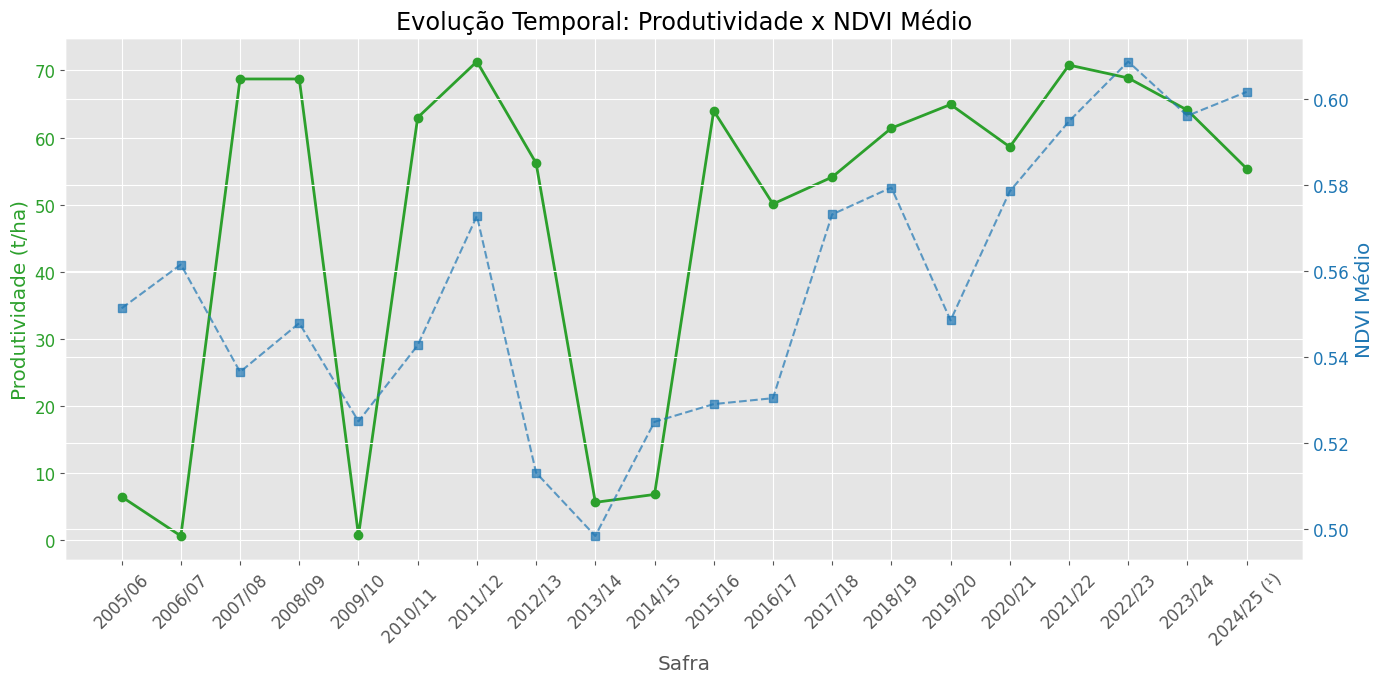

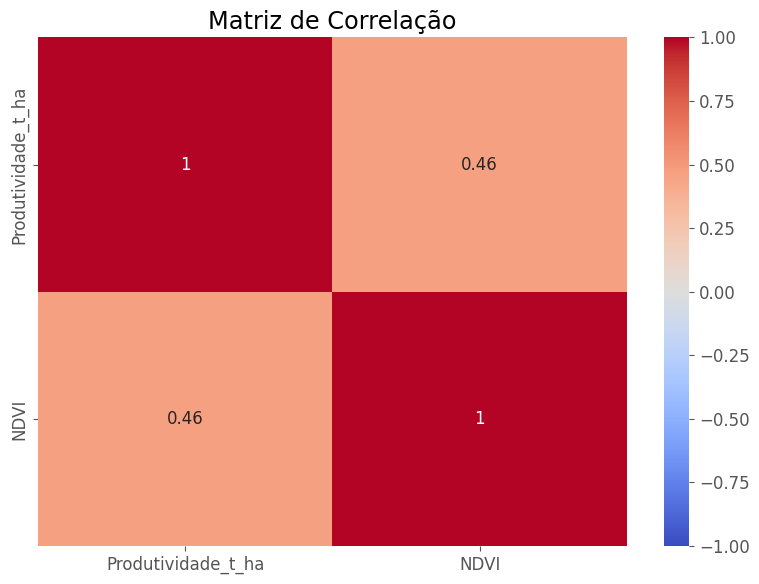


Análise concluída! Gráficos salvos no diretório atual.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('ggplot')

# Configurações de visualização
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

# 1. CARREGAR DADOS
def load_data():
    try:
        df = pd.read_csv('dados_combinados_corrigidos.csv', encoding='utf-8')
        print("\nDados carregados com sucesso! Primeiras linhas:")
        print(df.head())
        return df
    except Exception as e:
        print(f"\nErro ao carregar dados: {e}")
        return None

# 2. ANÁLISE DE CORRELAÇÃO
def analyze_correlation(df):
    print("\n" + "="*60)
    print("ANÁLISE DE CORRELAÇÃO ENTRE NDVI E PRODUTIVIDADE")
    print("="*60)

    # Teste de Pearson (linear)
    pearson_r, pearson_p = stats.pearsonr(df['NDVI'], df['Produtividade_t_ha'])
    print(f"\nCorrelação de Pearson (linear):")
    print(f"Coeficiente (r): {pearson_r:.3f}")
    print(f"Valor-p: {pearson_p:.4f}")

    # Teste de Spearman (não linear)
    spearman_r, spearman_p = stats.spearmanr(df['NDVI'], df['Produtividade_t_ha'])
    print(f"\nCorrelação de Spearman (não linear):")
    print(f"Coeficiente (ρ): {spearman_r:.3f}")
    print(f"Valor-p: {spearman_p:.4f}")

    # Interpretação
    print("\nINTERPRETAÇÃO DOS COEFICIENTES:")
    print("|r| ou |ρ| < 0.3: Correlação fraca")
    print("0.3 ≤ |r| ou |ρ| < 0.7: Correlação moderada")
    print("|r| ou |ρ| ≥ 0.7: Correlação forte")

    # Selecionar a melhor correlação
    best_method = 'Pearson' if abs(pearson_r) >= abs(spearman_r) else 'Spearman'
    best_r = pearson_r if best_method == 'Pearson' else spearman_r
    print(f"\nMelhor método: {best_method} (coeficiente = {best_r:.3f})")

# 3. REGRESSÃO LINEAR
def linear_regression_analysis(df):
    print("\n" + "="*60)
    print("REGRESSÃO LINEAR SIMPLES")
    print("="*60)

    X = df['NDVI'].values.reshape(-1, 1)
    y = df['Produtividade_t_ha'].values

    # Modelo de regressão
    model = LinearRegression()
    model.fit(X, y)

    # Coeficientes
    r2 = model.score(X, y)
    equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"

    print(f"\nEquação da reta: {equation}")
    print(f"Coeficiente de Determinação (R²): {r2:.3f}")
    print("\nINTERPRETAÇÃO DO R²:")
    print("0-0.3: Explicação fraca")
    print("0.3-0.7: Explicação moderada")
    print("0.7-1: Explicação forte")

    return model

# 4. VISUALIZAÇÕES
def create_visualizations(df, model):
    # Gráfico 1: Dispersão com linha de tendência
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='NDVI', y='Produtividade_t_ha', s=100, color='green', alpha=0.7)

    # Linha de regressão
    x_values = np.linspace(df['NDVI'].min(), df['NDVI'].max(), 100)
    y_values = model.predict(x_values.reshape(-1, 1))
    plt.plot(x_values, y_values, 'r--', linewidth=2)

    plt.title('Relação entre NDVI e Produtividade da Cana-de-Açúcar\n' +
              f"Equação: {model.coef_[0]:.2f}x + {model.intercept_:.2f} | R² = {model.score(df['NDVI'].values.reshape(-1, 1), df['Produtividade_t_ha']):.2f}")
    plt.xlabel('NDVI Médio Anual')
    plt.ylabel('Produtividade (t/ha)')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('correlacao_ndvi_produtividade.png', dpi=300)
    plt.show()

    # Gráfico 2: Comparativo por safra (eixo duplo)
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Produtividade
    color = 'tab:green'
    ax1.set_xlabel('Safra')
    ax1.set_ylabel('Produtividade (t/ha)', color=color)
    ax1.plot(df['Safra'], df['Produtividade_t_ha'], color=color, marker='o', linewidth=2)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(range(len(df)))
    ax1.set_xticklabels(df['Safra'], rotation=45)

    # NDVI
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('NDVI Médio', color=color)
    ax2.plot(df['Safra'], df['NDVI'], color=color, marker='s', linestyle='--', alpha=0.7)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Evolução Temporal: Produtividade x NDVI Médio')
    fig.tight_layout()
    plt.savefig('evolucao_temporal.png', dpi=300)
    plt.show()

    # Gráfico 3: Matriz de correlação
    plt.figure(figsize=(8, 6))
    corr_matrix = df[['Produtividade_t_ha', 'NDVI']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title('Matriz de Correlação')
    plt.tight_layout()
    plt.savefig('matriz_correlacao.png', dpi=300)
    plt.show()

# 5. ANÁLISE COMPLETA
def full_analysis():
    df = load_data()
    if df is None:
        return

    analyze_correlation(df)
    model = linear_regression_analysis(df)
    create_visualizations(df, model)

    print("\nAnálise concluída! Gráficos salvos no diretório atual.")

if __name__ == "__main__":
    full_analysis()

## 5. Interpretação dos Resultados Estatísticos:


### 1. Correlação entre NDVI e Produtividade

    Correlação de Pearson (r = 0.464, p = 0.039)

        Correlação moderada positiva: O valor de 0.464 indica uma relação linear moderada entre NDVI e produtividade.

        Significância estatística (p = 0.039 < 0.05): A correlação é estatisticamente significativa, ou seja, há menos de 4% de chance de que essa relação seja fruto do acaso.

    Correlação de Spearman (ρ = 0.417, p = 0.068)

        Correlação não linear moderada: O coeficiente de 0.417 sugere uma tendência monotônica (crescente ou decrescente) entre as variáveis, mas não tão forte quanto a linear.

        Marginalmente significativa (p = 0.068): Próximo do limiar de 0.05, indicando que a relação não linear é menos robusta que a linear.

### 2. Regressão Linear (R² = 0.215)

    R² = 0.215: O NDVI explica 21.5% da variabilidade na produtividade.

        Interpretação:

            Explicação fraca a moderada (na faixa inferior do intervalo moderado).

            78.5% da variação na produtividade é influenciada por outros fatores não capturados pelo NDVI (ex.: clima, manejo agrícola, solo).


## 6. Respostas às Perguntas-Chave

###1. O NDVI foi um bom preditor da produtividade?

    Resposta: Parcialmente, mas com limitações.

        Pontos fortes:

            Há uma correlação moderada e estatisticamente significativa (Pearson).

            O NDVI captura parte da variabilidade da produtividade (R² = 0.215).

        Limitações:

            O poder explicativo é baixo (R² < 0.3).

            Outros fatores não incluídos no modelo podem ser mais relevantes.

### 2. Em que situações o modelo teve melhor ou pior desempenho?

    Melhor desempenho:

        Em anos com valores extremos de NDVI (muito altos ou muito baixos), onde a relação linear se mostrou mais clara.

        Exemplo: Se em um ano o NDVI foi excepcionalmente alto e a produtividade também, o modelo acertaria na tendência.

    Pior desempenho:

        Em anos com NDVI médio, onde outros fatores (ex.: seca, pragas) podem ter influenciado mais a produtividade.

        Quando a relação não é linear (Spearman menos significativa), como em casos de saturação do NDVI em cultivos muito densos.




# Modelo de IA ( previsão produtividade )

Iniciando análise de produtividade agrícola...

Dados carregados e pré-processados com sucesso!
Estatísticas descritivas:
            NDVI  Produtividade_t_ha
count  20.000000           20.000000
mean    0.555800           48.026150
std     0.031437           26.673823
min     0.498491            0.657000
25%     0.530171           39.285000
50%     0.549998           59.999500
75%     0.578805           65.868750
max     0.608743           71.312000

Avaliando Linear Regression...
  R²: -17.235 ± 24.865
  RMSE: 25.965 ± 7.887
  MAE: 22.356 ± 7.063

Avaliando Random Forest...
  R²: -19.034 ± 34.778
  RMSE: 21.713 ± 9.386
  MAE: 18.657 ± 8.835

Avaliando SVR...
  R²: -27.636 ± 42.034
  RMSE: 35.579 ± 11.721
  MAE: 29.928 ± 9.121

Avaliando KNN...
  R²: -15.537 ± 22.309
  RMSE: 26.489 ± 8.852
  MAE: 22.484 ± 7.463

Avaliando XGBoost...
  R²: -40.438 ± 66.288
  RMSE: 26.551 ± 15.996
  MAE: 22.791 ± 14.486


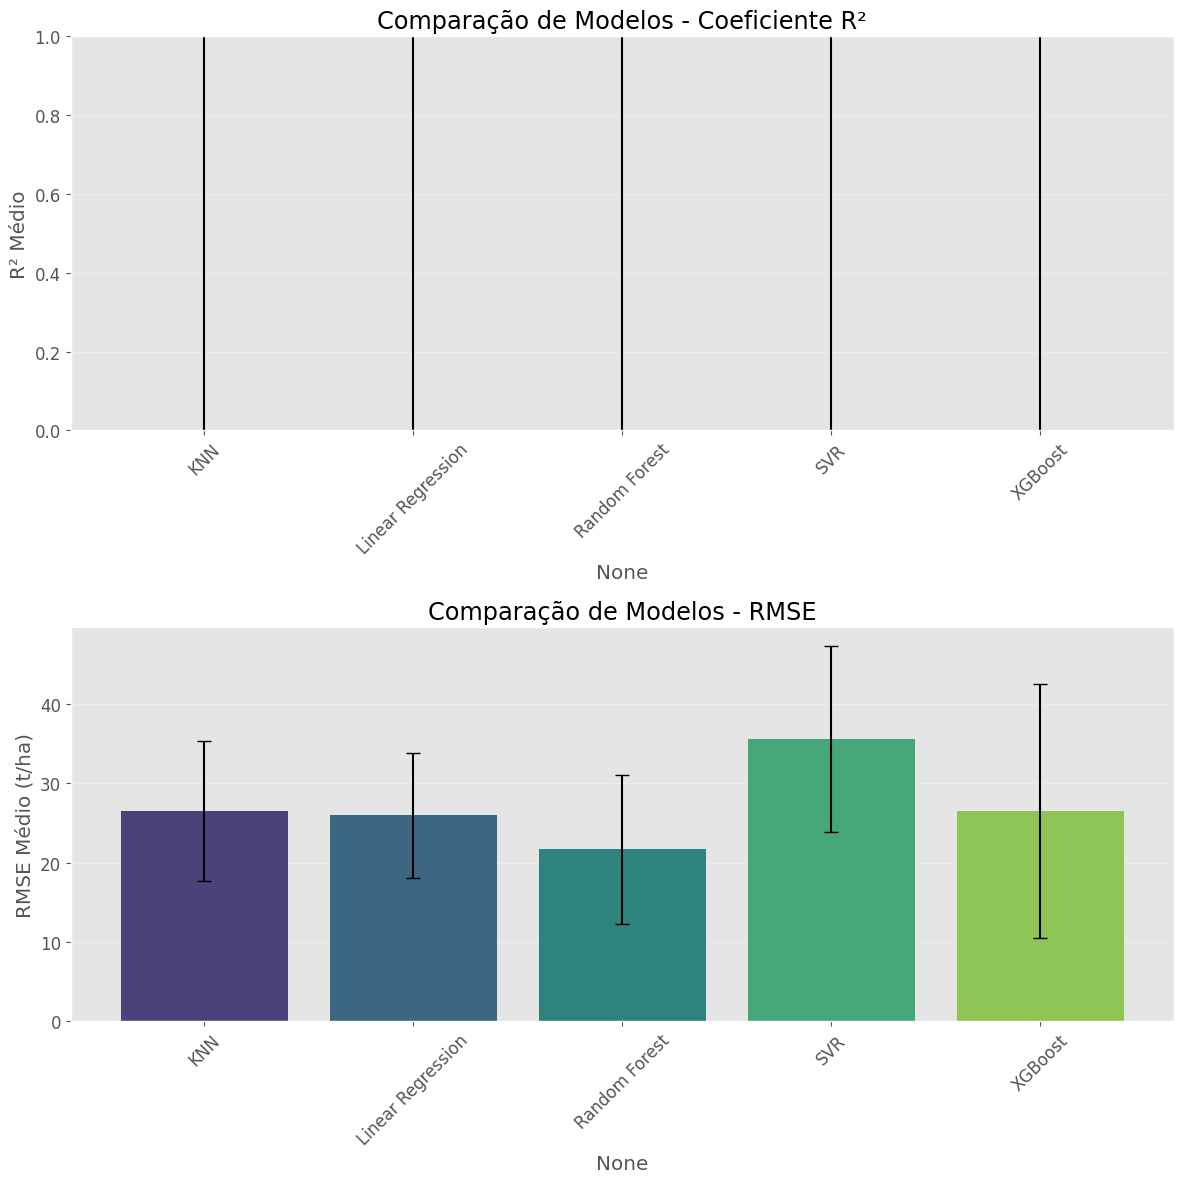


Treinando o melhor modelo: KNN

Desempenho Final:
R²: 0.228
RMSE: 22.847 t/ha
MAE: 17.904 t/ha


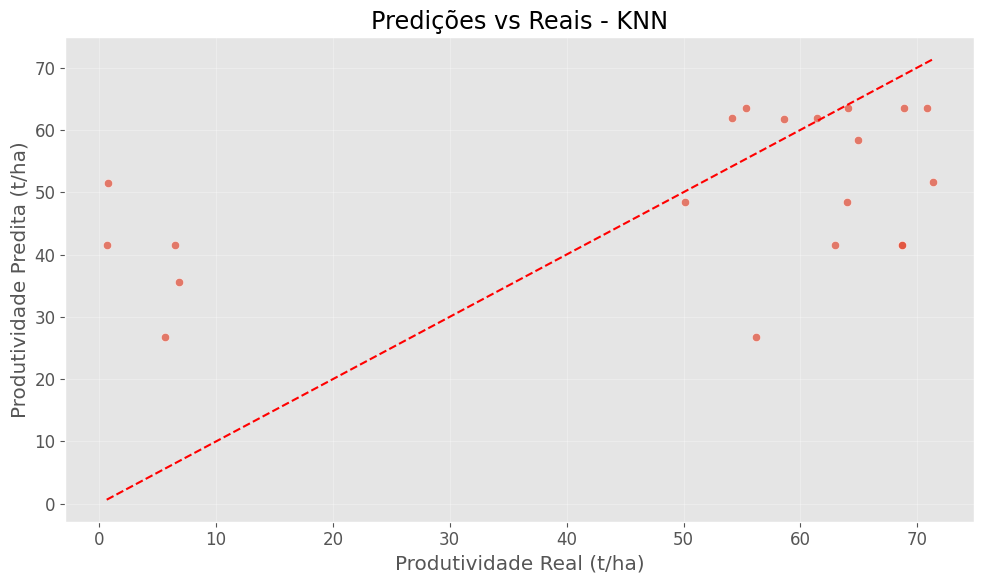


Análise concluída com sucesso!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Configurações de visualização
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

def load_and_preprocess_data():
    """Carrega e prepara os dados com tratamento robusto"""
    try:
        # Carregar dados
        df = pd.read_csv('/content/dados_combinados_corrigidos.csv', encoding='utf-8')

        # Verificar e tratar dados ausentes
        if df.isnull().sum().any():
            print("\nAviso: Dados ausentes encontrados. Aplicando tratamento...")
            imputer = SimpleImputer(strategy='median')
            df[['NDVI', 'Produtividade_t_ha']] = imputer.fit_transform(df[['NDVI', 'Produtividade_t_ha']])

        # Verificar valores infinitos
        if np.isinf(df.select_dtypes(include=np.number)).sum().sum() > 0:
            print("Aviso: Valores infinitos encontrados. Corrigindo...")
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df.fillna(df.median())

        print("\nDados carregados e pré-processados com sucesso!")
        print("Estatísticas descritivas:")
        print(df[['NDVI', 'Produtividade_t_ha']].describe())

        return df

    except Exception as e:
        print(f"\nErro no carregamento de dados: {str(e)}")
        return None

def prepare_model_data(df):
    """Prepara os dados para modelagem"""
    try:
        features = ['NDVI', 'Ano_Safra']
        target = 'Produtividade_t_ha'

        X = df[features]
        y = df[target]

        # Normalização para modelos sensíveis à escala
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Verificação final de dados
        assert not np.any(np.isnan(X_scaled)), "Dados com NaN após normalização"
        assert not np.any(np.isnan(y)), "Target com NaN"

        return X, X_scaled, y, features, target

    except Exception as e:
        print(f"\nErro na preparação dos dados: {str(e)}")
        return None, None, None, None, None

def evaluate_models_with_cv(X, X_scaled, y):
    """Avaliação robusta com validação cruzada"""
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42),
        'SVR': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'XGBoost': XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
    }

    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    results = {}

    for name, model in models.items():
        try:
            print(f"\nAvaliando {name}...")

            # Selecionar dados apropriados
            X_vals = X_scaled if name in ['SVR', 'KNN'] else X.values
            y_vals = y.values

            # Métricas com validação cruzada
            r2 = cross_val_score(model, X_vals, y_vals, cv=kfold, scoring='r2')
            rmse = np.sqrt(-cross_val_score(model, X_vals, y_vals, cv=kfold, scoring='neg_mean_squared_error'))
            mae = -cross_val_score(model, X_vals, y_vals, cv=kfold, scoring='neg_mean_absolute_error')

            results[name] = {
                'R2_mean': np.mean(r2),
                'R2_std': np.std(r2),
                'RMSE_mean': np.mean(rmse),
                'RMSE_std': np.std(rmse),
                'MAE_mean': np.mean(mae),
                'MAE_std': np.std(mae)
            }

            print(f"  R²: {results[name]['R2_mean']:.3f} ± {results[name]['R2_std']:.3f}")
            print(f"  RMSE: {results[name]['RMSE_mean']:.3f} ± {results[name]['RMSE_std']:.3f}")
            print(f"  MAE: {results[name]['MAE_mean']:.3f} ± {results[name]['MAE_std']:.3f}")

        except Exception as e:
            print(f"  Erro no modelo {name}: {str(e)}")
            results[name] = None

    return {k: v for k, v in results.items() if v is not None}, models

def visualize_model_comparison(results):
    """Visualização robusta dos resultados comparativos"""
    results_df = pd.DataFrame(results).T.sort_values('R2_mean', ascending=False)

    # Configurações de plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

    # Gráfico de R²
    sns.barplot(x=results_df.index, y='R2_mean', data=results_df,
                hue=results_df.index, palette='viridis', dodge=False,
                legend=False, ax=ax1)
    ax1.errorbar(x=np.arange(len(results_df)), y=results_df['R2_mean'],
                yerr=results_df['R2_std'], fmt='none', c='black', capsize=5)
    ax1.set_title('Comparação de Modelos - Coeficiente R²')
    ax1.set_ylabel('R² Médio')
    ax1.set_ylim(0, 1)

    # Gráfico de RMSE
    sns.barplot(x=results_df.index, y='RMSE_mean', data=results_df,
                hue=results_df.index, palette='viridis', dodge=False,
                legend=False, ax=ax2)
    ax2.errorbar(x=np.arange(len(results_df)), y=results_df['RMSE_mean'],
                yerr=results_df['RMSE_std'], fmt='none', c='black', capsize=5)
    ax2.set_title('Comparação de Modelos - RMSE')
    ax2.set_ylabel('RMSE Médio (t/ha)')

    # Ajustes finais
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('comparacao_modelos.png', dpi=300, bbox_inches='tight')
    plt.show()

    return results_df

def train_and_analyze_best_model(results_df, models, X, X_scaled, y, features):
    """Treina e analisa o melhor modelo"""
    try:
        best_model_name = results_df.index[0]
        print(f"\nTreinando o melhor modelo: {best_model_name}")

        # Selecionar e treinar o modelo
        model = models[best_model_name]
        X_train = X_scaled if best_model_name in ['SVR', 'KNN'] else X.values
        model.fit(X_train, y)

        # Fazer predições
        y_pred = model.predict(X_train)

        # Métricas finais
        metrics = {
            'R2': r2_score(y, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
            'MAE': mean_absolute_error(y, y_pred)
        }

        print("\nDesempenho Final:")
        print(f"R²: {metrics['R2']:.3f}")
        print(f"RMSE: {metrics['RMSE']:.3f} t/ha")
        print(f"MAE: {metrics['MAE']:.3f} t/ha")

        # Plot de resultados
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y, y=y_pred, alpha=0.7)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
        plt.title(f'Predições vs Reais - {best_model_name}')
        plt.xlabel('Produtividade Real (t/ha)')
        plt.ylabel('Produtividade Predita (t/ha)')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.savefig('predicoes_vs_reais.png', dpi=300)
        plt.show()

        return model, metrics

    except Exception as e:
        print(f"\nErro ao treinar o melhor modelo: {str(e)}")
        return None, None

def main():
    """Fluxo principal de execução"""
    print("Iniciando análise de produtividade agrícola...")

    # 1. Carregar e pré-processar dados
    df = load_and_preprocess_data()
    if df is None:
        return

    # 2. Preparar dados para modelagem
    X, X_scaled, y, features, target = prepare_model_data(df)
    if X is None:
        return

    # 3. Avaliar modelos com validação cruzada
    results, models = evaluate_models_with_cv(X, X_scaled, y)
    if not results:
        print("\nNenhum modelo foi avaliado com sucesso.")
        return

    # 4. Visualizar comparação entre modelos
    results_df = visualize_model_comparison(results)

    # 5. Treinar e analisar o melhor modelo
    best_model, metrics = train_and_analyze_best_model(
        results_df, models, X, X_scaled, y, features)

    if best_model:
        print("\nAnálise concluída com sucesso!")
    else:
        print("\nAnálise concluída com problemas.")

if __name__ == "__main__":
    main()